# 1. Предобработка

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [115]:
df = pd.read_csv('nba2k-full.csv')

In [116]:
df.isna().sum()

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        69
version         0
dtype: int64

тогда заменяем Nan в team и в education на "No team", "No education"

In [117]:
df['college'].fillna('No educaton',inplace=True)
df['team'].fillna('No team',inplace=True)

In [118]:
df = df.assign(birth_year=df.b_day)

def get_year_(value: str) -> int:
    last_n = value.split('/')[2]
    if (int("19"+last_n) > 1922):
        return int("19"+last_n)
    else:
        return int("20"+last_n)
        
df.birth_year = df.birth_year.apply(get_year_)

In [119]:
plt.rcParams['figure.figsize'] = (15, 10)

In [120]:
df = df.assign(height_f=df.height)
df = df.assign(weight_lbs=df.weight)

In [121]:
# разделяем столбцы веса

def get_weight(value: str) -> float:
    return float(value.split(' ')[3])

def get_weight_lbs(value: str) -> int:
    return int(value.split(' ')[0])
    
df.weight = df.weight.apply(get_weight)
df.weight_lbs = df.weight_lbs.apply(get_weight_lbs)

In [122]:
# разделяем столбцы роста

def get_height_f(value: str) -> str:
  return value.split('/')[0]

def get_height(value: str) -> float:
  return float(value.split('/')[1])
  #250 lbs. / 113.4 kg.


df.height_f = df.height_f.apply(get_height_f)
df.height = df.height.apply(get_height)

In [123]:
def get_year(value: str) -> str:
    first_ = value[:-2]
    last_n = value.split('/')[2]
    if (int("19"+last_n) > 1922):
        return first_+"19"+last_n
    else:
        return first_ + "20"+last_n
        
df.b_day = df.b_day.apply(get_year)

df['b_day'] = pd.to_datetime(df['b_day'], format='%m/%d/%Y')

In [124]:
# убираем из salary $ и переименовываем название таблички, аналогично с jersey
def get_str_without_first(value: str) -> int:
    return int(value[1:])

df = df.rename(columns={'salary': 'salary_in_d'},inplace=False)

df.salary_in_d = df.salary_in_d.apply(get_str_without_first)
df.jersey = df.jersey.apply(get_str_without_first)

In [125]:
df.head(10)

,full_name,rating,jersey,team,position,b_day,height,weight,salary_in_d,country,draft_year,draft_round,draft_peak,college,version,birth_year,height_f,weight_lbs
0,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,2.06,113.4,37436858,USA,2003,1,1,No educaton,NBA2k20,1984,6-9,250
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,2.01,102.1,32742000,USA,2011,1,15,San Diego State,NBA2k20,1991,6-7,225
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,1994-12-06,2.11,109.8,25842697,Greece,2013,1,15,No educaton,NBA2k20,1994,6-11,242
3,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,2.08,104.3,37199000,USA,2007,1,2,Texas,NBA2k20,1988,6-10,230
4,James Harden,96,13,Houston Rockets,G,1989-08-26,1.96,99.8,38199000,USA,2009,1,3,Arizona State,NBA2k20,1989,6-5,220
5,Stephen Curry,95,30,Golden State Warriors,G,1988-03-14,1.91,83.9,40231758,USA,2009,1,7,Davidson,NBA2k20,1988,6-3,185
6,Anthony Davis,94,3,Los Angeles Lakers,F-C,1993-03-11,2.08,100.7,27093019,USA,2012,1,1,Kentucky,NBA2k20,1993,6-10,222
7,Paul George,93,13,Los Angeles Clippers,F,1990-05-02,2.03,95.3,33005556,USA,2010,1,10,Fresno State,NBA2k20,1990,6-8,210
8,Damian Lillard,92,0,Portland Trail Blazers,G,1990-07-15,1.88,88.5,29802321,USA,2012,1,6,Weber State,NBA2k20,1990,6-2,195
9,Joel Embiid,91,21,Philadelphia 76ers,C,1994-03-16,2.13,113.4,27504630,Cameroon,2014,1,3,Kansas,NBA2k20,1994,7-0,250


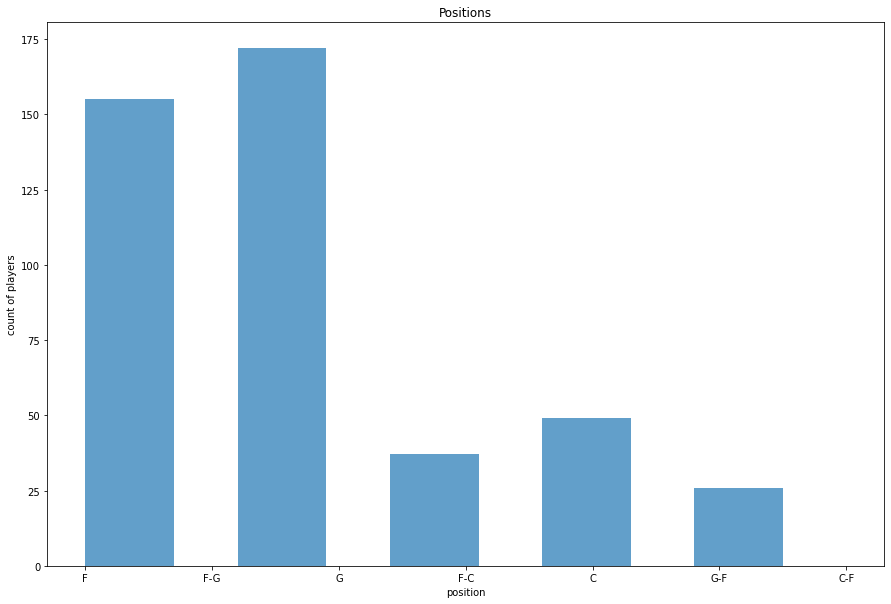

position
C       49
C-F      6
F      141
F-C     37
F-G     14
G      172
G-F     20
Name: rating, dtype: int64

In [126]:
plt.hist(
  df.position, 
  bins=5,
  alpha=0.7,
  width=0.7
)

plt.title('Positions')
plt.xlabel('position')
plt.ylabel('count of players')
plt.show()

df.groupby('position') \
  .rating \
  .count()

Стало ясно, что в таблице G-F и F-G считаются за разные позиции, поэтому всего получается не 7, а 5 позиций

In [127]:
df = df.replace('C-F', 'F-C')
df = df.replace('G-F', 'F-G')

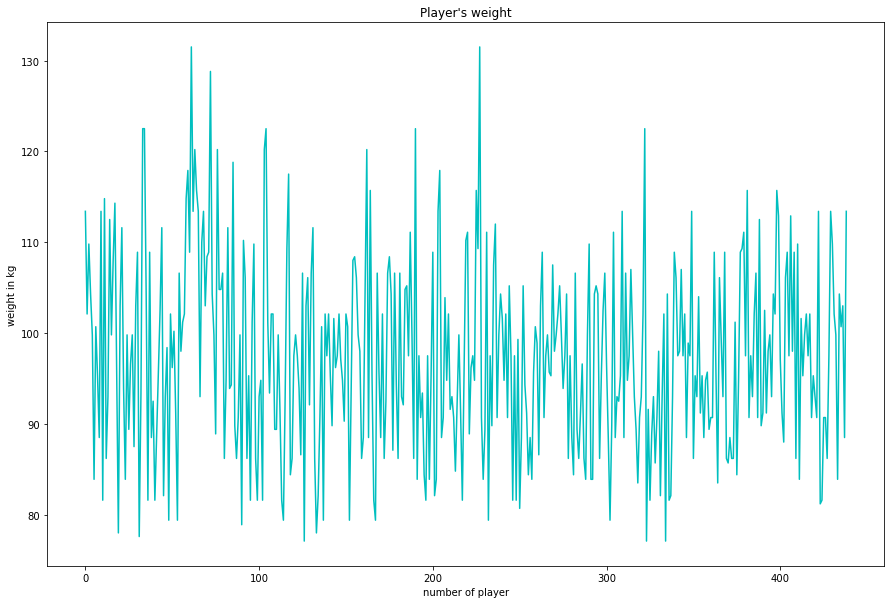

In [128]:
plt.plot(df.weight, 'c')

plt.title('Player\'s weight')
plt.xlabel('number of player')
plt.ylabel('weight in kg')
plt.show()

Видно, что вес у всех игроков примерно 90-105. Не особенно большой вес, учитывая их рост.

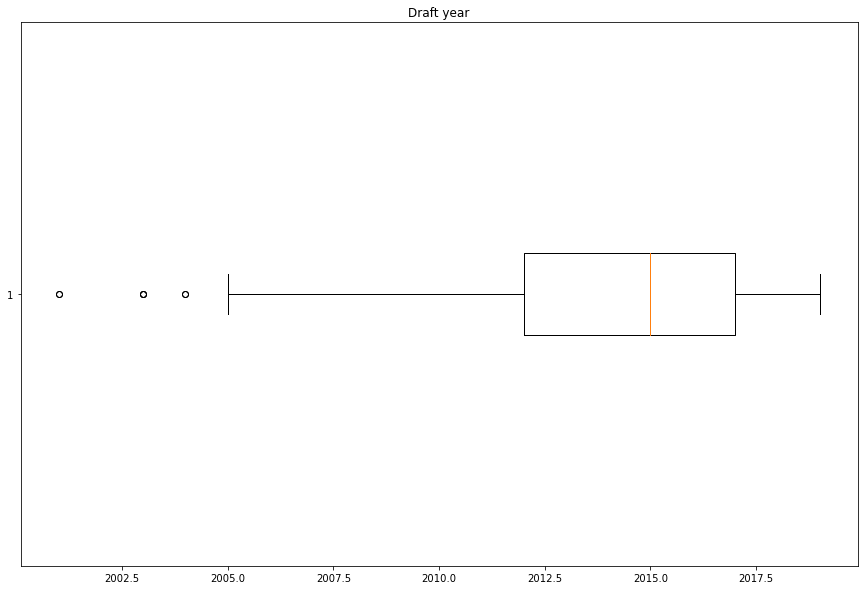

In [129]:
plt.boxplot(df.draft_year,
            vert=False
           )
plt.title('Draft year')
plt.show()

Медианный draft_year 2015 год, можно предположить, что примерно каждые 5 лет идет почти полное обновление команды. А "срок годности" игрока примерно 4-6 лет. 

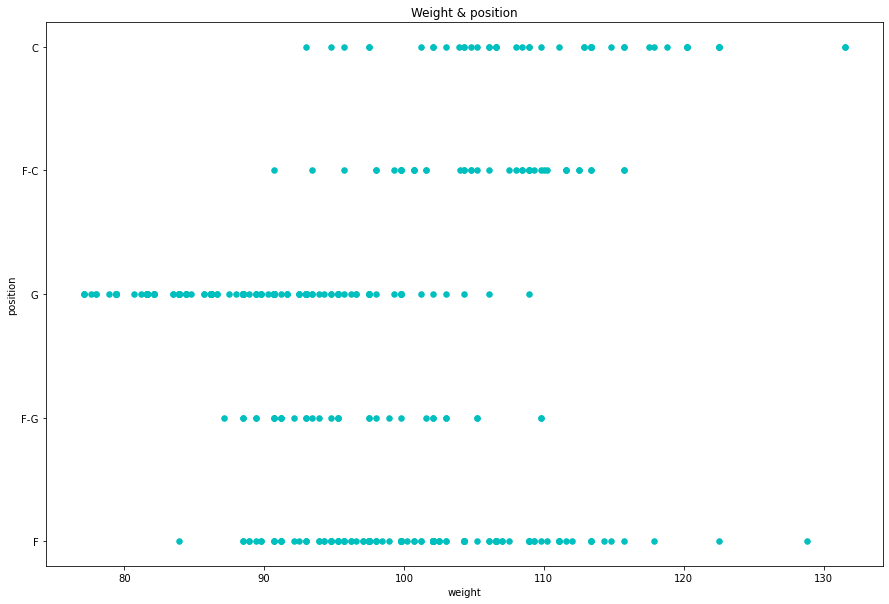

In [130]:
plt.scatter(df.weight, 
            df.position,
            s=30, 
            color='c'
           )
plt.title('Weight & position')
plt.xlabel('weight')
plt.ylabel('position')
plt.show()            

Тут по весу можно примерно понять, какие качества ценятся в данной позиции, например G (guard) должен быть легким, а C(center) большим, чтобы защищать от атак кольцо.

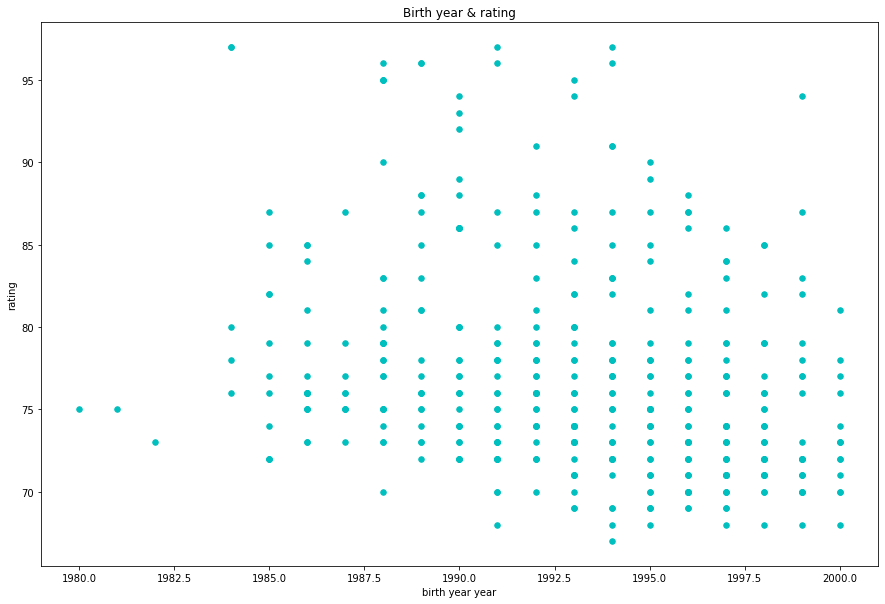

In [131]:
plt.scatter(df.birth_year, 
            df.rating,
            s=30,  
            color='c'
           )
plt.title('Birth year & rating')
plt.xlabel('birth year year')
plt.ylabel('rating')
plt.show()           

Можно предположить, что своего пика карьеры баскетболист достигает в 28-30, уже опытный, но всё ещё в форме.

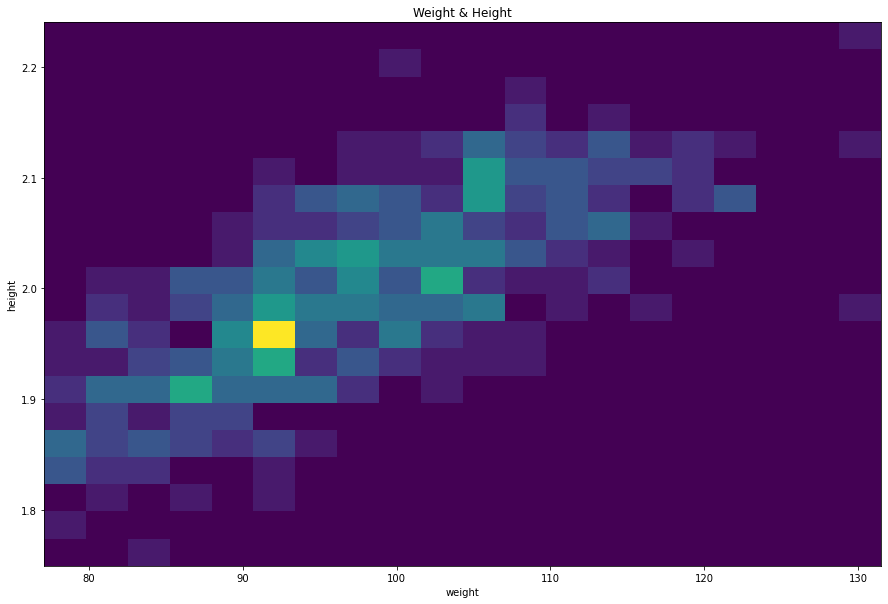

In [132]:
plt.hist2d(df.weight, df.height, bins=20)

plt.title('Weight & Height')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [133]:
df = df.assign(imt = df.weight / df.height.pow(2))
df.head(4)

,full_name,rating,jersey,team,position,b_day,height,weight,salary_in_d,country,draft_year,draft_round,draft_peak,college,version,birth_year,height_f,weight_lbs,imt
0,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,2.06,113.4,37436858,USA,2003,1,1,No educaton,NBA2k20,1984,6-9,250,26.722594
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,2.01,102.1,32742000,USA,2011,1,15,San Diego State,NBA2k20,1991,6-7,225,25.271652
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,1994-12-06,2.11,109.8,25842697,Greece,2013,1,15,No educaton,NBA2k20,1994,6-11,242,24.662519
3,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,2.08,104.3,37199000,USA,2007,1,2,Texas,NBA2k20,1988,6-10,230,24.107803


# 2. Интерполяция кривой

In [134]:
import numpy as np
import random as rnd
from scipy import interpolate
import numpy as np

Создадим 5-20 рандомных точек

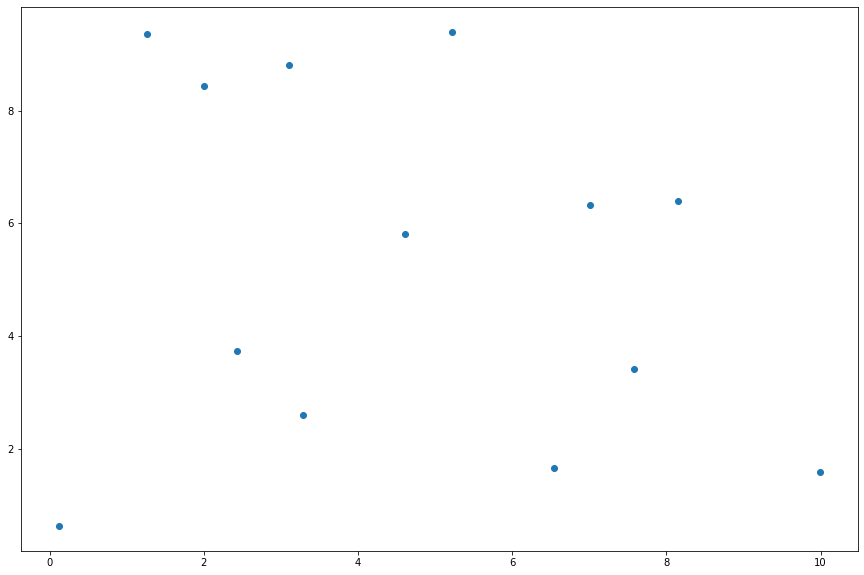

In [135]:
amount = rnd.randint(5, 20)

x = [rnd.random() * 10 for _ in range(amount)]
y = [rnd.random() * 10 for _ in range(amount)]
plt.plot(x, y, 'o')
plt.show()

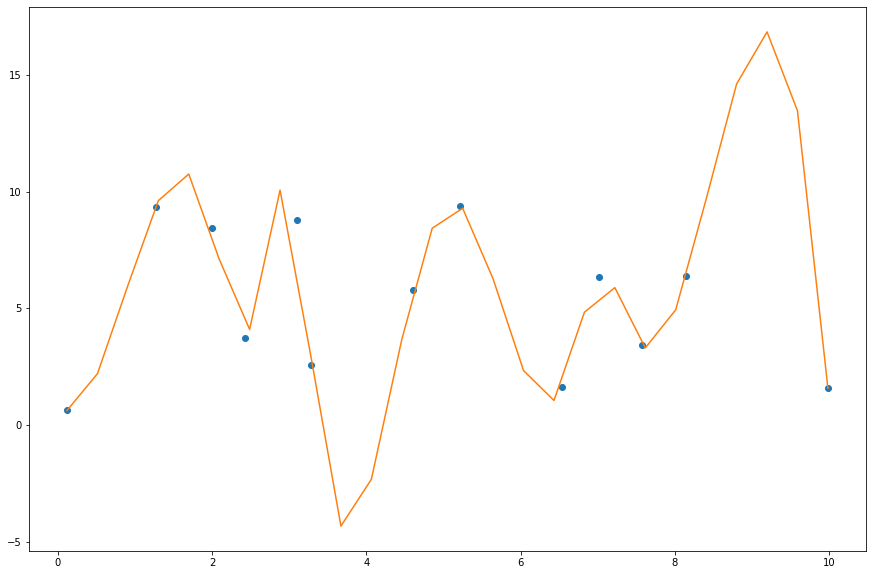

In [136]:
cubic_int = interpolate.interp1d(x, y, kind = 'cubic')
x_new = np.linspace(min(x), max(x), amount*2)
plt.plot(x, y, 'o', x_new, cubic_int(x_new))

In [137]:
def f_newtone(x_vector, y_vector):
    
    def a_coeff():
        x_vector_copy = np.copy(x_vector)
        a = np.copy(y_vector)
        size_x = len(x_vector)
        for k in range(1, size_x):
            a[k:size_x] = (a[k:size_x] - a[k - 1])/(x_vector_copy[k:size_x] - x_vector_copy[k - 1])
        return a

    def f(x):
        a = a_coeff()
        n = len(x_vector) - 1 
        p = a[n]

        for k in range(1, n + 1):
            p = a[n - k] + (x - x_vector[n - k])*p

        return p
        
    return f

Тут я поняла, что ньютон не реализован в встроенной библиотеке, поэтому релизовала лагранжа.

In [138]:
def f_lagrang(x_vector, y_vector):

    def mnog_lag(x, k):
        L=1
        for j in range(len(x_vector)):
            if (j!=k):
                L*=(x-x_vector[j])/(x_vector[k]-x_vector[j])
        return L

    def f(x):
        answer = 0
        for i in range (0, len(y_vector)):
            answer += y_vector[i]*mnog_lag(x, i)
        return answer
    
    return f

In [139]:
sc_l = interpolate.lagrange(x, y)
my_n = f_newtone(x, y)
my_l = f_lagrang(x, y)

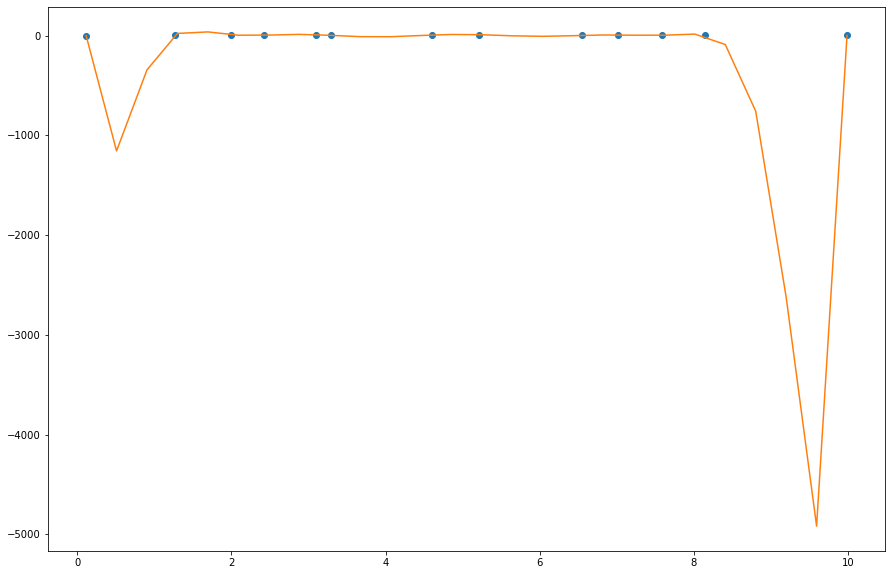

In [140]:
plt.plot(x, y, 'o', x_new, my_n(x_new))

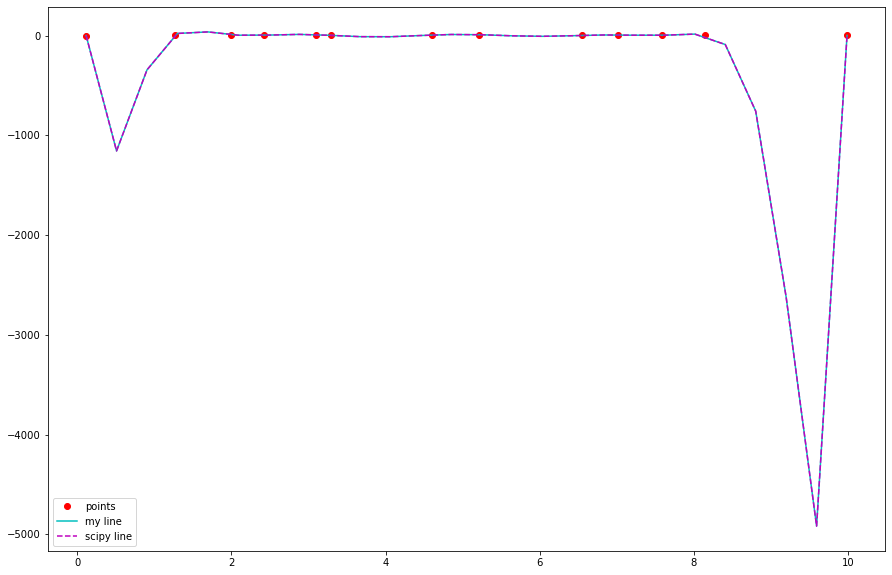

In [141]:
ax = plt.figure().add_subplot()
ax.plot(x, y, 'o r', label='points')
ax.plot(x_new, my_l(x_new), 'c', label='my line')
ax.plot(x_new, sc_l(x_new), '--m', label='scipy line')
ax.legend()
plt.show()

# 3. Быстрая гистограмма

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


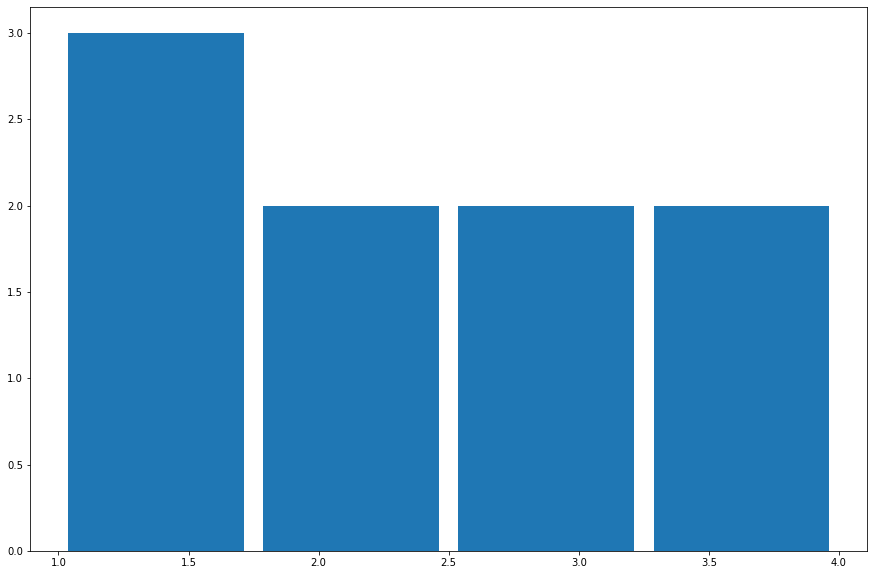

In [142]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=len(set(array)), 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [143]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    first_el=min(array)
    last_el=max(array)
    cell=(last_el-first_el)/bins
    buns_names = [first_el+cell*i for i in range (bins)]
    value_counts = [0] * bins
    for x in array:
        value_counts[ min(int((x-first_el)/cell), bins-1) ] +=1

    return (value_counts, bins_names)

<BarContainer object of 4 artists>

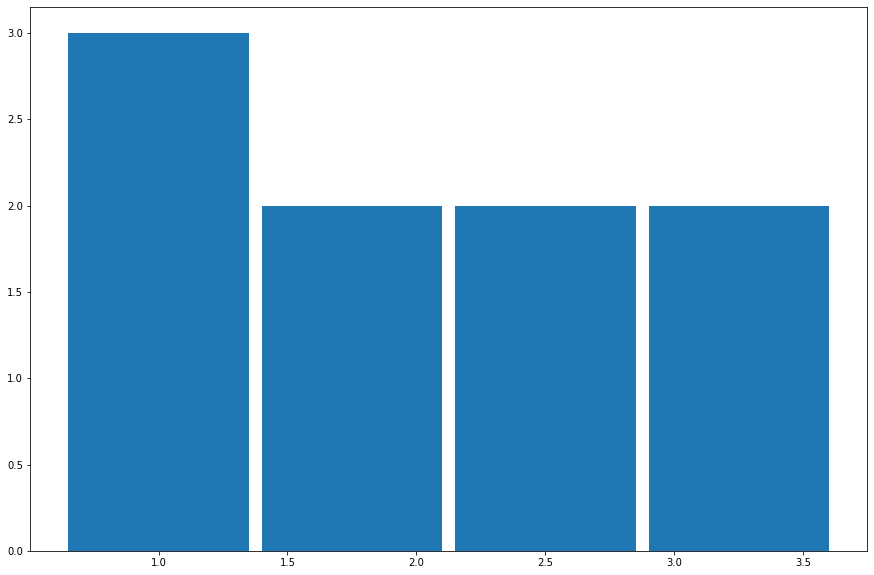

In [144]:
value_counts_my, bins_names_my, = fast_hist(array, len(set(array)))

plt.bar(bins_names_my[:-1], value_counts_my, width=0.7)

In [145]:
random_big_array = [rnd.random() * 100 for _ in range(60)]

61.6 ms ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
33.2 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


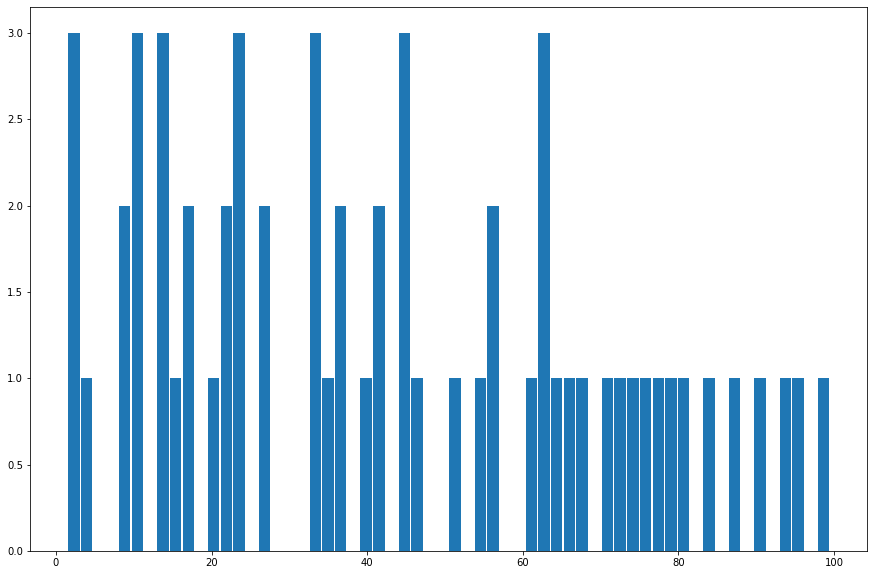

In [146]:
%timeit plt.hist(random_big_array, bins=len(set(random_big_array)), rwidth=0.9)
%timeit fast_hist(random_big_array, len(set(random_big_array)))